# Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Reading the test dataset

In [2]:
Employees_test_data=pd.read_csv('/kaggle/input/employee-attrition-dataset/test.csv')
Employees_test_data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


# The train data

In [3]:
Employees_train_data=pd.read_csv('/kaggle/input/employee-attrition-dataset/train.csv')
Employees_train_data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left


# Checking for missing values

In [4]:
Employees_train_data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

# Describing the data

In [5]:
Employees_train_data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


# Unique values

In [6]:
for column in Employees_train_data.columns:
    if Employees_train_data[column].dtype == object:
        print(str(column)+ ' : '+ str(Employees_train_data[column].unique()))
        print(Employees_train_data[column].value_counts())

Gender : ['Male' 'Female']
Gender
Male      32739
Female    26859
Name: count, dtype: int64
Job Role : ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Job Role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64
Work-Life Balance : ['Excellent' 'Poor' 'Good' 'Fair']
Work-Life Balance
Good         22528
Fair         18046
Excellent    10719
Poor          8305
Name: count, dtype: int64
Job Satisfaction : ['Medium' 'High' 'Very High' 'Low']
Job Satisfaction
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64
Performance Rating : ['Average' 'Low' 'High' 'Below Average']
Performance Rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64
Overtime : ['No' 'Yes']
Overtime
No     40148
Yes    19450
Name: count, dtype: int64
Education Level : ['Associate Degree' 'Master’s Degree' 'Bachelor’s Deg

# Label encoding

In [7]:
columns=['Gender', 'Monthly Income', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
le =LabelEncoder()
Employees_train_data[columns]=Employees_train_data[columns].apply(le.fit_transform)

# Visualization

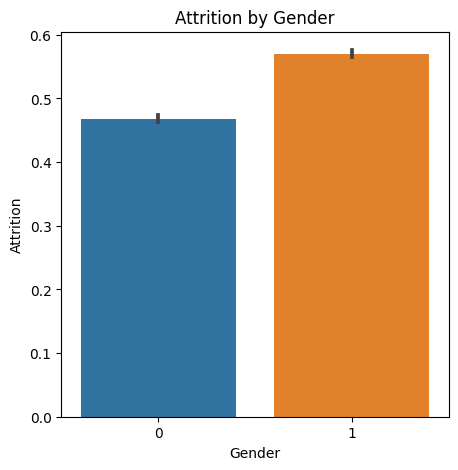

In [8]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Gender', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition')
plt.show()

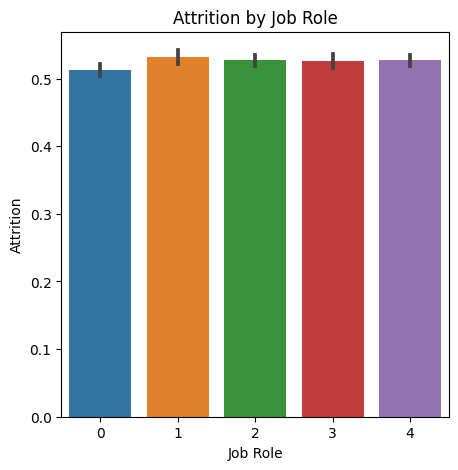

In [9]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Job Role', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition')
plt.show()

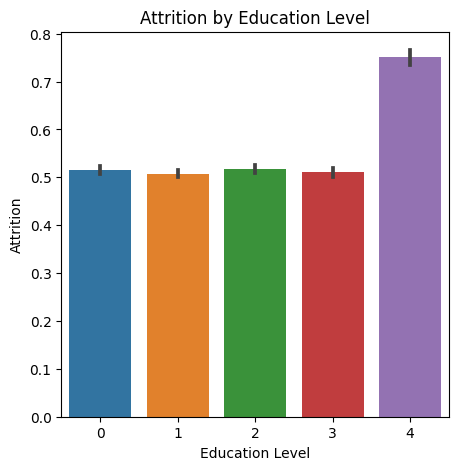

In [10]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Education Level', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition')
plt.show()

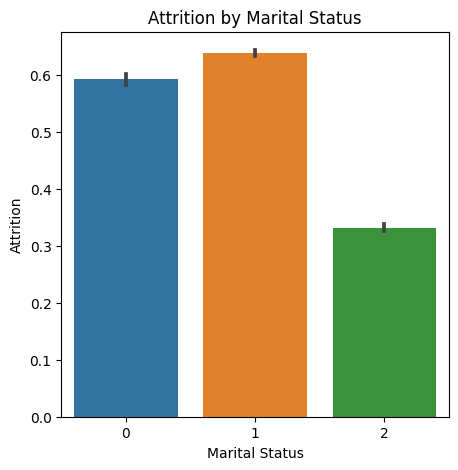

In [11]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Marital Status', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition')
plt.show()

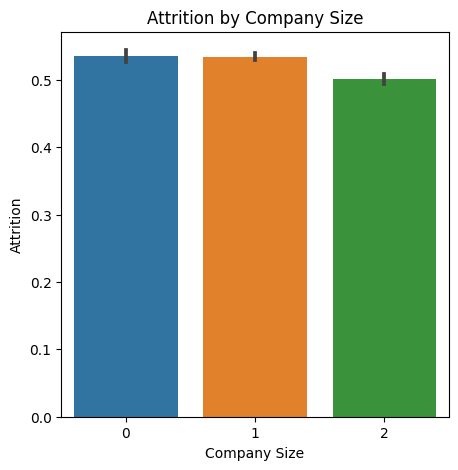

In [12]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Company Size', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Attrition')
plt.show()

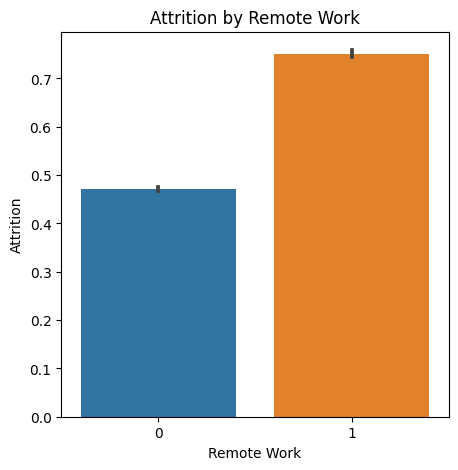

In [13]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Remote Work', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Remote Work')
plt.xlabel('Remote Work')
plt.ylabel('Attrition')
plt.show()

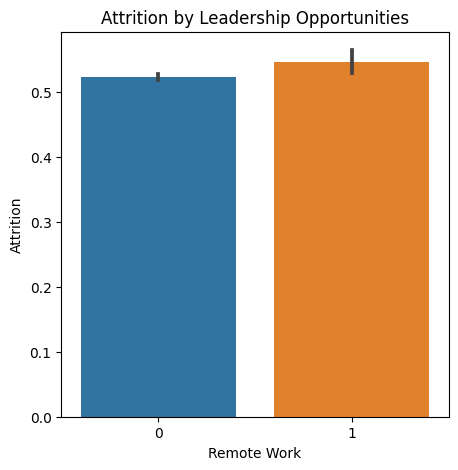

In [14]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Leadership Opportunities', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Leadership Opportunities')
plt.xlabel('Remote Work')
plt.ylabel('Attrition')
plt.show()

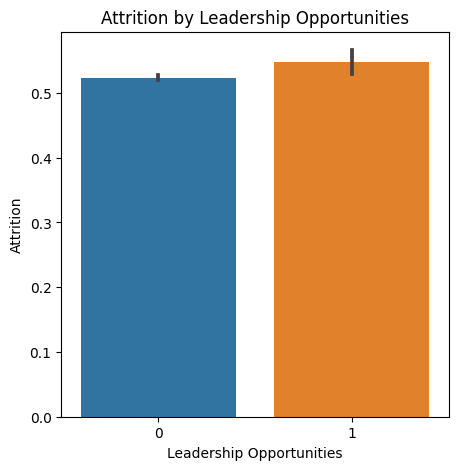

In [15]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Leadership Opportunities', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Leadership Opportunities')
plt.xlabel('Leadership Opportunities')
plt.ylabel('Attrition')
plt.show()

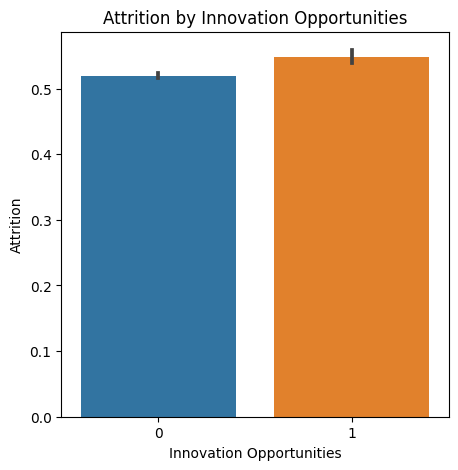

In [16]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Innovation Opportunities', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Innovation Opportunities')
plt.xlabel('Innovation Opportunities')
plt.ylabel('Attrition')
plt.show()

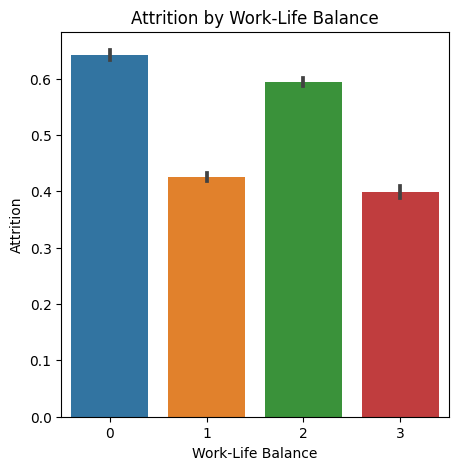

In [17]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Work-Life Balance', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Attrition')
plt.show()

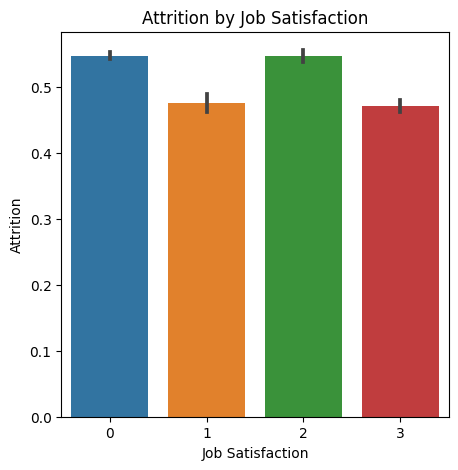

In [18]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Job Satisfaction', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition')
plt.show()

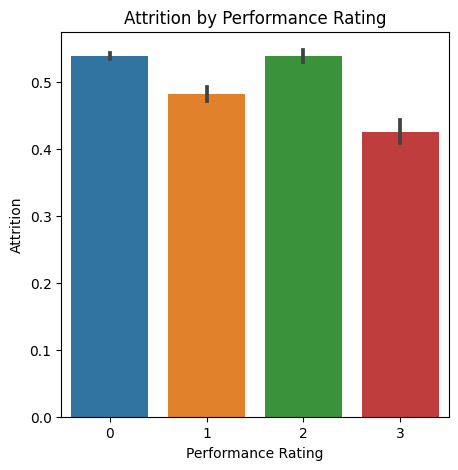

In [19]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Performance Rating', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Attrition')
plt.show()

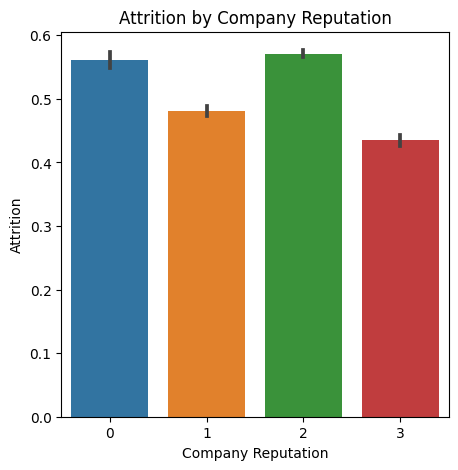

In [20]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Company Reputation', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Company Reputation')
plt.xlabel('Company Reputation')
plt.ylabel('Attrition')
plt.show()

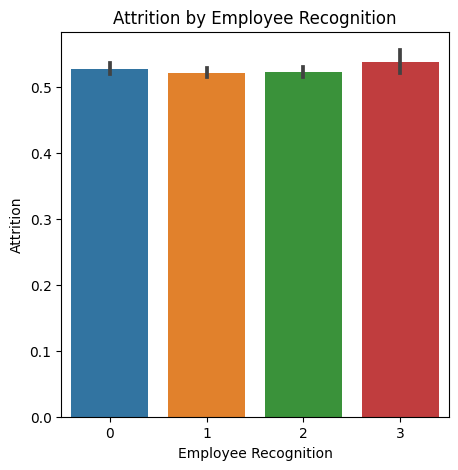

In [21]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Employee Recognition', y='Attrition',data=Employees_train_data)
plt.title('Attrition by Employee Recognition')
plt.xlabel('Employee Recognition')
plt.ylabel('Attrition')
plt.show()

# Correlation heatmap

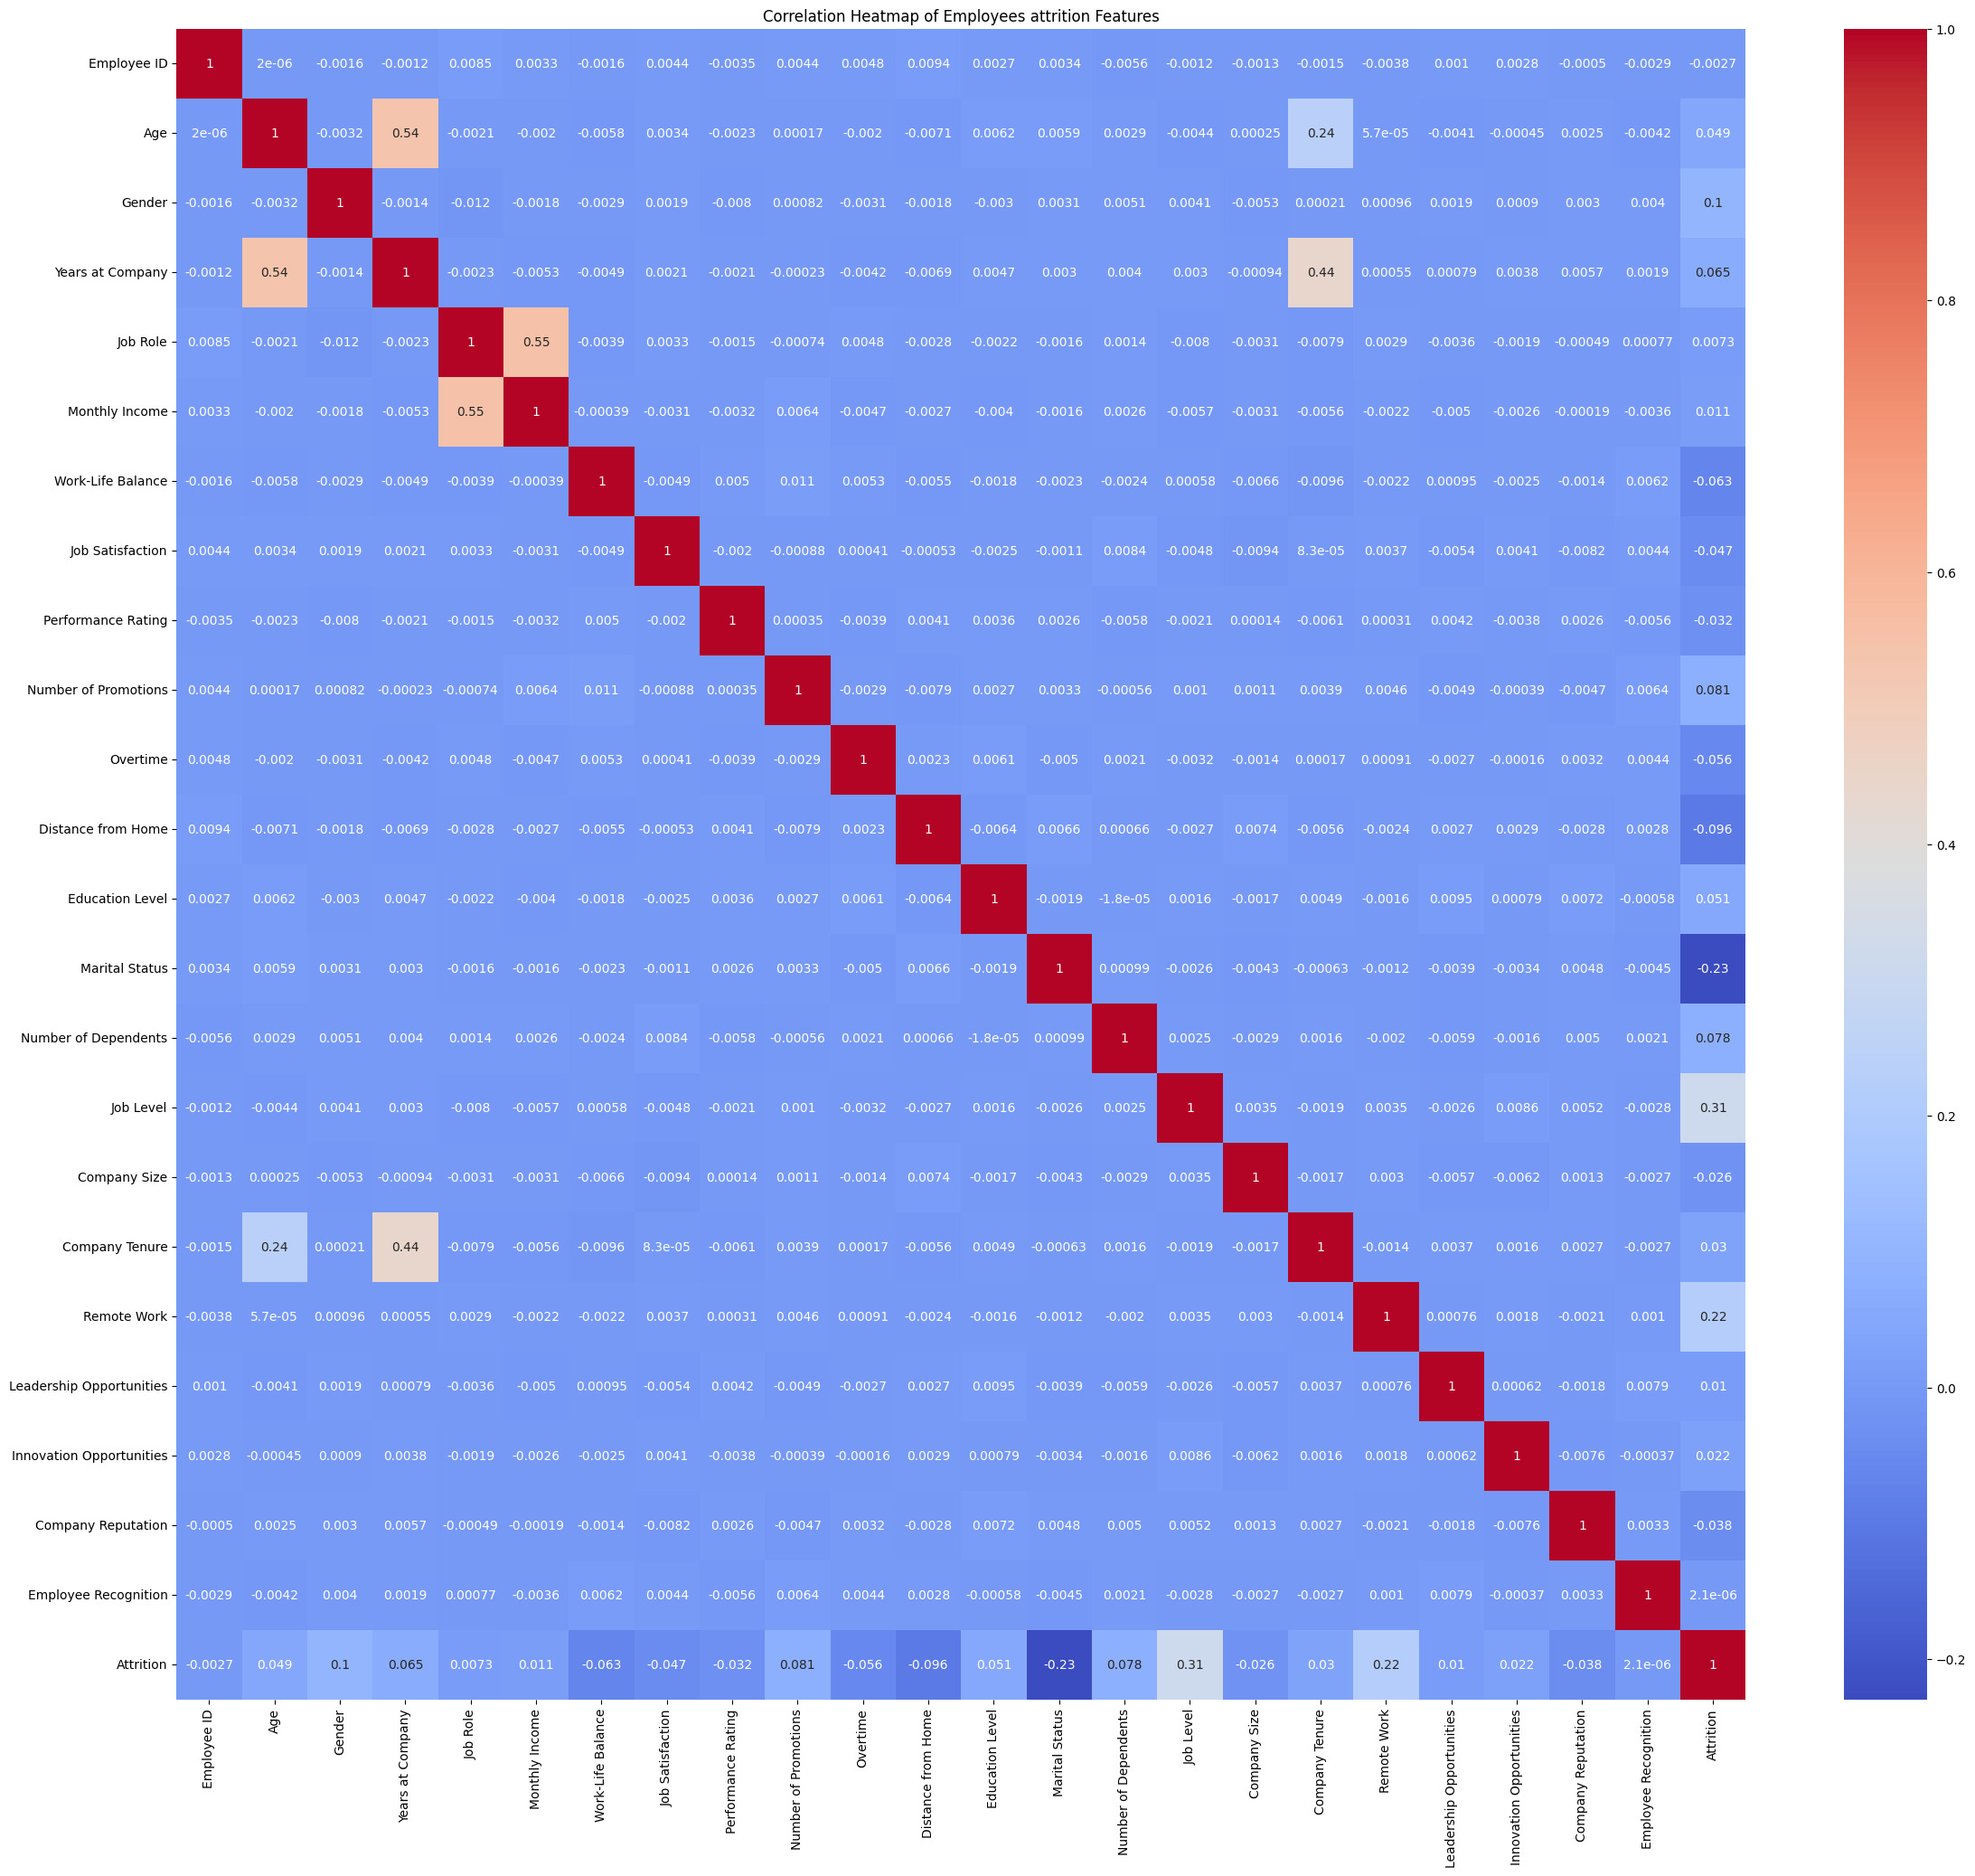

In [22]:
# Correlation matrix
plt.figure(figsize=(28, 24))
corr_matrix = Employees_train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Employees attrition Features')
plt.show()

# Columns in the dataset

In [23]:
Employees_train_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

# Displaying the head of the Train data

In [24]:
Employees_train_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,2611,0,2,0,2,...,0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,2755,3,0,3,3,...,3,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,5380,2,0,3,0,...,3,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,1212,2,0,2,1,...,2,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,2042,1,3,0,0,...,0,2,1,68,0,0,0,1,2,1


# Choosing the column we are going to use for predictions

In [25]:
y=Employees_train_data.Attrition
y.tail()

59593    0
59594    0
59595    1
59596    0
59597    1
Name: Attrition, dtype: int64

# Choosing the features

In [26]:
columns=['Gender', 'Monthly Income', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
X=Employees_train_data[columns]
X.head()

,Gender,Monthly Income,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,1,2611,0,0,2,0,0,0,1,1,1,0,0,0,0,2,1
1,0,2755,3,3,0,3,0,3,0,1,1,0,0,0,1,1,1
2,0,5380,2,2,0,3,0,1,1,1,1,0,0,0,3,1,1
3,0,1212,0,2,0,2,0,2,2,1,2,1,0,0,2,2,1
4,1,2042,0,1,3,0,1,2,0,2,1,0,0,0,1,2,1


# Spliting the data 

In [27]:
X_train, X_test ,y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=42)

# Creating the model

In [28]:
Model=DecisionTreeClassifier()

# Fitting the model

In [29]:
Model.fit(X_train, y_train)

DecisionTreeClassifier()

# Test data predictions

In [30]:
y_pred=Model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

# Accuracy score

In [31]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 100.00%


# Classification report

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5667
           1       1.00      1.00      1.00      6253

    accuracy                           1.00     11920
   macro avg       1.00      1.00      1.00     11920
weighted avg       1.00      1.00      1.00     11920



# Confusion matrix

In [33]:
confusion_m =confusion_matrix(y_test, y_pred)
confusion_m

array([[5667,    0],
       [   0, 6253]])

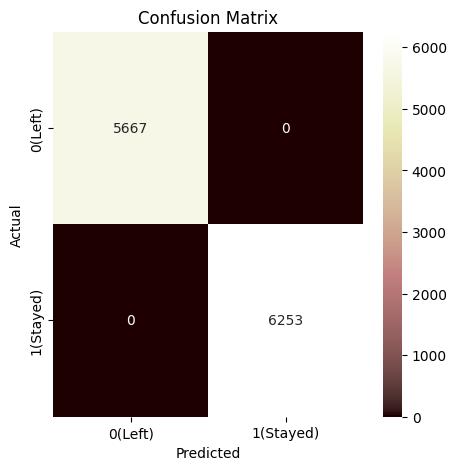

In [34]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_m, 
            annot=True, 
            fmt='d', 
            cmap='pink',
            xticklabels=['0(Left)', '1(Stayed)'],
            yticklabels=['0(Left)', '1(Stayed)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()